# Homework 1: Classifiers
#### Name: Wang Zixu        ID: 2201212423

In [42]:
import pandas as pd
import numpy as np

In [43]:
file_path = r"C:\Users\lenovo\Desktop\Machine Learning for Finance\Kaggle-Give-Me-Some-Data"

In [44]:
a = list(range(12))
a.remove(0)
df_train = pd.read_csv(file_path + "/cs-training.csv", usecols = a)  # drop the first column then read_csv

In [45]:
df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


### 1. Fill-in the missing values (nan) with the column means.

In [46]:
# check which column has nan
check_nan = df_train.isnull().sum()
check_nan

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [47]:
index = check_nan[check_nan > 0].index
index

Index(['MonthlyIncome', 'NumberOfDependents'], dtype='object')

In [48]:
values = {}
for i in index:
    values[i] = round(df_train[i].mean())  # 四舍五入取整，保证格式的一致
values

{'MonthlyIncome': 6670, 'NumberOfDependents': 1}

In [49]:
df_train = df_train.fillna(value = values)
df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,6670.0,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


###  2. Select the 2 most important features using LogisticRegression with L1 penalty.

In [50]:
# 划分训练集和测试集

from sklearn.model_selection import train_test_split
X, y = df_train.iloc[:, 1:], df_train.iloc[:,0]

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [71]:
X_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
70904,0.066554,61,0,0.207773,4090.0,9,0,1,0,1.0
63717,0.006597,68,0,6.000000,6670.0,9,0,0,0,0.0
88897,0.646088,34,0,0.283652,5125.0,6,0,0,0,0.0
56330,0.000000,61,0,24.000000,6670.0,2,0,0,0,0.0
84825,0.164887,51,0,0.400920,5000.0,11,1,2,0,3.0
...,...,...,...,...,...,...,...,...,...,...
115229,0.014029,68,0,0.054119,3750.0,7,0,0,0,1.0
89110,0.000000,71,0,0.471128,4900.0,12,0,1,0,0.0
93992,0.218599,51,0,3521.000000,6670.0,11,0,2,0,0.0
20627,0.388499,54,0,0.473450,4500.0,8,0,1,0,2.0


In [81]:
# 特征标准化处理
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
lr = LogisticRegression(C=0.001, penalty='l1',solver='liblinear') 
# L1 penalty 只能用 "liblinear" solver

In [84]:
lr.fit(X_train_std,y_train)

LogisticRegression(C=0.001, penalty='l1', solver='liblinear')

In [85]:
lr.coef_[lr.coef_!=0].shape # check the number of the features with non-zero weights

(2,)

In [86]:
column = df_train.columns[1:]
column[(lr.coef_!=0).reshape(-1)]

# 2 most important features as follow

Index(['age', 'NumberOfTime30-59DaysPastDueNotWorse'], dtype='object')

In [87]:
# redefine X_train_std and X_test_std
X_train_std = X_train_std[:, lr.coef_[0]!=0]
X_test_std = X_test_std[:, lr.coef_[0]!=0]

### Using the 2 selected features, apply LR / SVM / decision tree. Try your own hyperparameters (C, gamma, tree depth, etc) to maximize the prediction accuracy.

#### 1. LR

In [21]:
# C = 0.00001
lr = LogisticRegression(C=0.00001, penalty='l1',solver='liblinear')
lr.fit(X_train_std, y_train)

print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.9331619047619047
Test accuracy: 0.9331555555555555


In [22]:
# # C = 0.1
lr = LogisticRegression(C=0.1, penalty='l1',solver='liblinear')
lr.fit(X_train_std, y_train)

print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.9333523809523809
Test accuracy: 0.9332666666666667


#### 2. SVM

In [23]:
from sklearn.svm import SVC

In [24]:
## C=0.5,gamma=0.5
svm = SVC(C=0.5,gamma=0.5,kernel='linear')
svm.fit(X_train_std, y_train)
print('Training accuracy:', svm.score(X_train_std, y_train))
print('Test accuracy:', svm.score(X_test_std, y_test))

Training accuracy: 0.9331619047619047
Test accuracy: 0.9331555555555555


In [25]:
## C=0.5,gamma=1e-3
svm = SVC(C=0.5,gamma=1e-3,kernel='linear')
svm.fit(X_train_std, y_train)
print('Training accuracy:', svm.score(X_train_std, y_train))
print('Test accuracy:', svm.score(X_test_std, y_test))

Training accuracy: 0.9331619047619047
Test accuracy: 0.9331555555555555


#### 3. Desicion Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
## max_depth=3
tree = DecisionTreeClassifier(criterion='gini',max_depth=3)
tree.fit(X_train_std, y_train)
print('Training accuracy:', tree.score(X_train_std, y_train))
print('Test accuracy:', tree.score(X_test_std, y_test))

Training accuracy: 0.9334380952380953
Test accuracy: 0.9330888888888889


In [28]:
## max_depth=6
tree = DecisionTreeClassifier(criterion='gini',max_depth=6)

tree.fit(X_train_std, y_train)
print('Training accuracy:', tree.score(X_train_std, y_train))
print('Test accuracy:', tree.score(X_test_std, y_test))

Training accuracy: 0.9337142857142857
Test accuracy: 0.9335555555555556


#### 总结：SVM速度最慢，LR和Decision Tree速度较快，三者处理该二分类问题的预测能力几乎一致，都达到了93%左右。

### 3. Visualize the classifiers

In [29]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion

In [30]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')

In [31]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

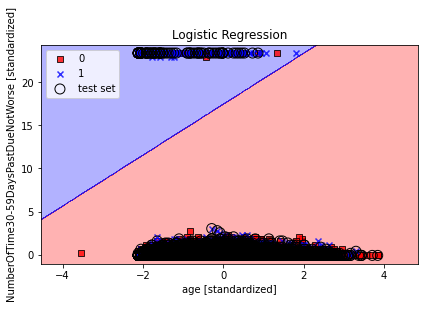

In [37]:
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=lr, test_idx=range(105000, 150000))

plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [standardized]')  # 标准化之后，值确实就在这个范围，纵坐标没画错
plt.title("Logistic Regression")

plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

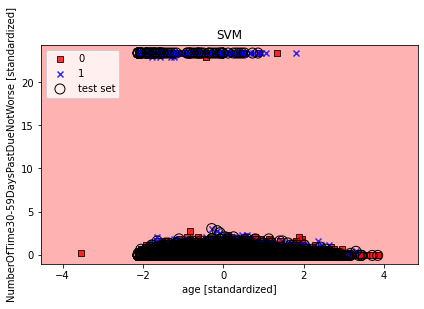

In [90]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=svm, test_idx=range(105000, 150000))
plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [standardized]') 
plt.title("SVM")

plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

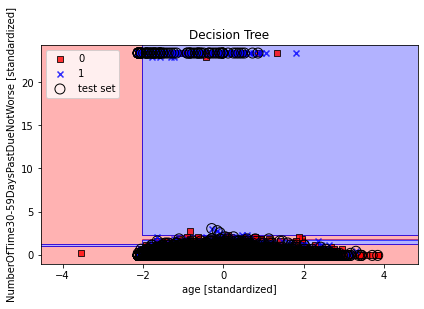

In [89]:
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=tree, test_idx=range(105000, 150000))
plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [standardized]') 
plt.title("Decision Tree")

plt.legend(loc='upper left')

plt.tight_layout()
plt.show()